# MATH6350 Homework 2
Group: Carolina Garza, Michael Saenz, Ray Thomas

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [ ]:
# Import fonts
lucida = pd.read_csv('LUCIDA.csv')
times = pd.read_csv('TIMES.csv')
frank = pd.read_csv('FRANKLIN.csv')
tahoma = pd.read_csv('TAHOMA.csv')

In [ ]:
# Drop unnecessary columns
lucida = lucida.drop(columns = ["fontVariant", "m_label", "orientation", "m_top", "m_left", "originalH", "originalW", "h", "w"])
times = times.drop(columns = ["fontVariant", "m_label", "orientation", "m_top", "m_left", "originalH", "originalW", "h", "w"])
frank = frank.drop(columns = ["fontVariant", "m_label", "orientation", "m_top", "m_left", "originalH", "originalW", "h", "w"])
tahoma = tahoma.drop(columns = ["fontVariant", "m_label", "orientation", "m_top", "m_left", "originalH", "originalW", "h", "w"])

In [ ]:
# Drop rows with null values
lucida = lucida.dropna()
times = times.dropna()
frank = frank.dropna()
tahoma = tahoma.dropna()

In [ ]:
# Define CL1 to be the subset of lucida with 'strength' = 0.4 and 'italics' = 0
CL1 = lucida[lucida['strength'] == 0.4]
CL1 = CL1[CL1['italic'] == 0]

In [ ]:
# Define CL2 to be the subset of times with 'strength' = 0.4 and 'italics' = 0
CL2 = times[times['strength'] == 0.4]
CL2 = CL2[CL2['italic'] == 0]

In [ ]:
# Define CL3 to be the subset of frank with 'strength' = 0.4 and 'italics' = 0
CL3 = frank[frank['strength'] == 0.4]
CL3 = CL3[CL3['italic'] == 0]

In [ ]:
# Define CL4 to be the subset of tahoma with 'strength' = 0.4 and 'italics' = 0
CL4 = tahoma[tahoma['strength'] == 0.4]
CL4 = CL4[CL4['italic'] == 0]

In [ ]:
# Find the lengths of each class and the total of the classes
N1 = len(CL1)
N2 = len(CL2)
N3 = len(CL3)
N4 = len(CL4)
N = N1 + N2 + N3 + N4

In [ ]:
print("Size of CL1: ", N1)
print("Size of CL2: ", N2)
print("Size of CL3: ", N3)
print("Size of CL4: ", N4)
print("Size of Data: ", N)

Size of CL1:  3794
Size of CL2:  4805
Size of CL3:  3931
Size of CL4:  3323
Size of Data:  15853


In [ ]:
# Putting all the classes together
data = pd.concat([CL1, CL2, CL3, CL4])
data = data.reset_index(drop=True)        #resetting the indexes
data = data.drop(columns=['font','strength','italic'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15853 entries, 0 to 15852
Columns: 400 entries, r0c0 to r19c19
dtypes: int64(400)
memory usage: 48.4 MB


## Part 1

#### 1.1

Feature X210 = 'r10c09
'

In [ ]:
#Calculating the means of feature X210 for each of the classes
A1 = CL1.iloc[:, [210+2]].mean()
A2 = CL2.iloc[:, [210+2]].mean()
A3 = CL3.iloc[:, [210+2]].mean()
A4 = CL4.iloc[:, [210+2]].mean()
print("A1: ", round(A1,2))
print("A2: ", round(A2,2))
print("A3: ", round(A3,2))
print("A4: ", round(A4,2))

A1:  r10c9    111.42
dtype: float64
A2:  r10c9    89.94
dtype: float64
A3:  r10c9    131.21
dtype: float64
A4:  r10c9    95.14
dtype: float64


In [ ]:
from scipy  import stats

Checking Normality Assumption


In [ ]:
stats.shapiro(CL1.iloc[:, [210+2]])

(0.7244523167610168, 0.0)

In [ ]:
stats.shapiro(CL2.iloc[:, [210+2]])

(0.7169223427772522, 0.0)

In [ ]:
stats.shapiro(CL3.iloc[:, [210+2]])

(0.7060014009475708, 0.0)

In [ ]:
stats.shapiro(CL4.iloc[:, [210+2]])

(0.6958661675453186, 0.0)

Since the Shapiro-Wilkes test for normaility of feature 'X210' in each class results in p-values < $\alpha = 0.05$ level, we reject the null hypothesis that it is normally distributed. This indicates to us that a T-test would not be ideal for this data.

Checking Equal Variance Assumption

In [ ]:
stats.levene(CL1['r10c9'],CL2['r10c9'])

LeveneResult(statistic=110.10844984533489, pvalue=1.3243333506282974e-25)

In [ ]:
stats.levene(CL1['r10c9'],CL3['r10c9'])

LeveneResult(statistic=38.02016680898135, pvalue=7.353851071670669e-10)

In [ ]:
stats.levene(CL1['r10c9'],CL4['r10c9'])

LeveneResult(statistic=41.713387490907344, pvalue=1.1264449889126026e-10)

In [ ]:
stats.levene(CL2['r10c9'],CL3['r10c9'])

LeveneResult(statistic=282.50538884623955, pvalue=2.0312835453663157e-62)

In [ ]:
stats.levene(CL2['r10c9'],CL4['r10c9'])

LeveneResult(statistic=5.61425957407581, pvalue=0.0178381394338091)

In [ ]:
stats.levene(CL3['r10c9'],CL4['r10c9'])

LeveneResult(statistic=134.21193704452708, pvalue=9.151263533147766e-31)

The Levene's Test for equal variance produces p-values > $\alpha = 0.01$  for all pairs except for CL1 with CL3, and CL1 with CL4. Thus, based on $\alpha = 0.01$ we must reject the null hypothesis that pairs CL1 with CL3, and CL1 with CL4 have equal variance. For all others, we fail to reject the null hypothesis that that the pairs have equal variance. 

Performing T-Test

In [ ]:
result1 = stats.ttest_ind(CL1['r10c9'], CL2['r10c9'])
result1

Ttest_indResult(statistic=8.838927046244875, pvalue=1.158089002512424e-18)

In [ ]:
result2 = stats.ttest_ind(CL1['r10c9'], CL3['r10c9'])
result2

Ttest_indResult(statistic=-7.382652469744569, pvalue=1.7134857052625733e-13)

In [ ]:
result3 = stats.ttest_ind(CL1['r10c9'], CL4['r10c9'], equal_var=False)
result3

Ttest_indResult(statistic=5.9721603137562065, pvalue=2.4555559289543064e-09)

In [ ]:
result4 = stats.ttest_ind(CL2['r10c9'], CL3['r10c9'])
result4

Ttest_indResult(statistic=-16.869971997532094, pvalue=7.354357881455104e-63)

In [ ]:
result5 = stats.ttest_ind(CL2['r10c9'], CL4['r10c9'], equal_var=True)
result5

Ttest_indResult(statistic=-2.0801295458371976, pvalue=0.03754491484073064)

In [ ]:
result6 = stats.ttest_ind(CL3['r10c9'], CL4['r10c9'], equal_var=True)
result6

Ttest_indResult(statistic=13.082926158210203, pvalue=1.1273462792915113e-38)

The results of the t-test show that at the $\alpha = 0.01$ level, the means for the pairs CL1 with CL3, and CL1 with CL4 are equal. For the rest, there is not enough evidence to suggest that they are the same.

Histograms of 'X210' for each class

Text(0.5, 0, 'Values')

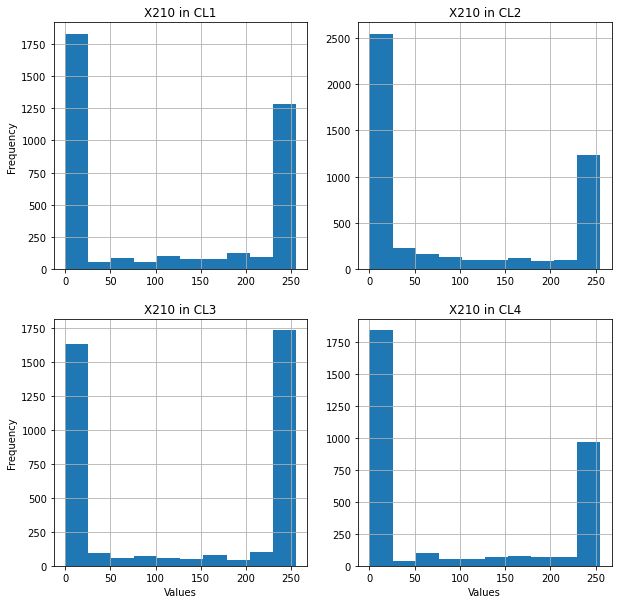

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
CL1['r10c9'].hist()
plt.title('X210 in CL1')

plt.ylabel('Frequency')

plt.subplot(222)
CL2['r10c9'].hist()
plt.title('X210 in CL2')


plt.subplot(223)
CL3['r10c9'].hist()
plt.title('X210 in CL3')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(224)
CL4['r10c9'].hist()
plt.title('X210 in CL4')
plt.xlabel('Values')


In [ ]:
from scipy.stats import ks_2samp
test1 = ks_2samp(CL1['r10c9'], CL2['r10c9'],mode = "asymp")
test1

Ks_2sampResult(statistic=0.10803728105662203, pvalue=6.421954906146147e-22)

In [ ]:
test2 = ks_2samp(CL1['r10c9'], CL3['r10c9'])
test2

Ks_2sampResult(statistic=0.12112666480446103, pvalue=1.0)

In [ ]:
test3 = ks_2samp(CL1['r10c9'], CL4['r10c9'],mode = "asymp")
test3

Ks_2sampResult(statistic=0.08028594494276486, pvalue=2.4156338264614034e-10)

In [ ]:
test4 = ks_2samp(CL2['r10c9'], CL3['r10c9'],mode = "asymp")
test4

Ks_2sampResult(statistic=0.21273428663170169, pvalue=2.0417309757475523e-85)

In [ ]:
test5 = ks_2samp(CL2['r10c9'], CL4['r10c9'],mode = "asymp")
test5

Ks_2sampResult(statistic=0.06406269424811084, pvalue=1.9876619376369277e-07)

In [ ]:
test6 = ks_2samp(CL3['r10c9'], CL4['r10c9'],mode = "asymp")
test6

Ks_2sampResult(statistic=0.15923369058173442, pvalue=4.387174691500466e-40)

Based on the comparisons between the histograms of 'X210' for each class made by the Kolmogorov-Smirnov test, we see that the p-value is consistently < $\alpha = 0.05$ value. We can conclude that there are statistical significant differences.


Taking into account the results from the T-test as well as those from the Kolmogorov-Smirnov test, we can say that the 'X210' feature DOES have strong  discriminating power for the four classes. 

#### 1.2

In [ ]:
corrs = data.corr()
high_corrs = corrs.unstack().sort_values(kind="quicksort")[159580:159600]
round(high_corrs, 2)

r12c1   r11c1     0.92
r11c1   r12c1     0.92
r9c2    r10c2     0.92
r10c2   r9c2      0.92
r0c2    r0c1      0.92
r0c1    r0c2      0.92
r11c0   r12c0     0.92
r12c0   r11c0     0.92
r9c1    r10c1     0.92
r10c1   r9c1      0.92
r13c1   r12c1     0.92
r12c1   r13c1     0.92
r19c17  r19c18    0.93
r19c18  r19c17    0.93
r0c1    r0c0      0.93
r0c0    r0c1      0.93
r19c1   r19c0     0.94
r19c0   r19c1     0.94
r19c19  r19c18    0.94
r19c18  r19c19    0.94
dtype: float64

The correlation between pix(6,13) and pix(7,13) can be read by looking at the intersection of r6c13 and r7c13 in the correlation matrix.

In [ ]:
print("The correlation between pix(6,13) and pix(7,13) is ", round(corrs['r6c13']['r7c13'],2))
print("The correlation between pix(6,1) and pix(6,18) is ", round(corrs['r6c1']['r6c18'],2))

The correlation between pix(6,13) and pix(7,13) is  0.79
The correlation between pix(6,1) and pix(6,18) is  0.44


*Interpretation:*  
The correlations between elements on the same column is greater than correlation between elements on the same row.



#### 1.3

In [ ]:
#standardizing data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(data)
SDATA = scaler.transform(data)
SDATA = pd.DataFrame(scaler.transform(data))

#### 1.4

In [ ]:
#Generate True class col vector
TRUC = pd.concat([CL1['font'], CL2['font'], CL3['font'], CL4['font']]).reset_index(drop=True) 
TRUC

0        LUCIDA
1        LUCIDA
2        LUCIDA
3        LUCIDA
4        LUCIDA
          ...  
15848    TAHOMA
15849    TAHOMA
15850    TAHOMA
15851    TAHOMA
15852    TAHOMA
Name: font, Length: 15853, dtype: object

In [ ]:
bound_SDATA = pd.concat([TRUC, SDATA], axis=1, ignore_index=True)
SCL1 = bound_SDATA[bound_SDATA[0] == 'LUCIDA']
SCL2 = bound_SDATA[bound_SDATA[0] == 'TIMES']
SCL3 = bound_SDATA[bound_SDATA[0] == 'FRANKLIN']
SCL4 = bound_SDATA[bound_SDATA[0] == 'TAHOMA']


## Part 2


#### 2.1

In [ ]:
SCL1X = SCL1.drop(columns=[0])
SCL1Y = SCL1[0]
SCL2X = SCL2.drop(columns=[0])
SCL2Y = SCL2[0]
SCL3X = SCL3.drop(columns=[0])
SCL3Y = SCL3[0]
SCL4X = SCL4.drop(columns=[0])
SCL4Y = SCL4[0]

In [ ]:
TRUC.unique()

array(['LUCIDA', 'TIMES', 'FRANKLIN', 'TAHOMA'], dtype=object)

In [ ]:
#Split into train and test sets
from sklearn.model_selection import train_test_split
SCL1X_train, SCL1X_test, SCL1Y_train, SCL1Y_test = train_test_split(SCL1X,SCL1Y, test_size=0.2, random_state=42)
SCL2X_train, SCL2X_test, SCL2Y_train, SCL2Y_test = train_test_split(SCL2X,SCL2Y, test_size=0.2, random_state=42)
SCL3X_train, SCL3X_test, SCL3Y_train, SCL3Y_test = train_test_split(SCL3X,SCL3Y, test_size=0.2, random_state=42)
SCL4X_train, SCL4X_test, SCL4Y_train, SCL4Y_test = train_test_split(SCL4X,SCL4Y, test_size=0.2, random_state=42)

#Combine training sets into one set
x_train = pd.concat([SCL1X_train, SCL2X_train, SCL3X_train, SCL4X_train]).reset_index(drop=True)
y_train = pd.concat([SCL1Y_train, SCL2Y_train, SCL3Y_train, SCL4Y_train]).reset_index(drop=True)
#Combine test sets into one set
x_test = pd.concat([SCL1X_test, SCL2X_test, SCL3X_test, SCL4X_test]).reset_index(drop = True)
y_test = pd.concat([SCL1Y_test, SCL2Y_test, SCL3Y_test, SCL4Y_test]).reset_index(drop=True)

In [ ]:
x_train

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400
0,-0.619802,-0.681710,-0.734125,-0.781316,-0.816448,-0.882516,-0.958398,-0.995625,-0.580896,0.839405,1.059332,-1.049073,-1.069706,-1.057096,-1.005865,-0.939339,-0.883925,-0.816623,-0.298879,0.930981,-0.611224,-0.708096,-0.817782,-0.923175,-1.019796,-1.083415,-1.120751,-0.265654,0.975718,0.631052,1.024956,-1.191996,-1.232482,-1.230325,-1.207828,-1.159422,-1.063823,-0.919368,0.741968,-0.051384,...,-0.717857,-0.874608,-1.050328,-1.212799,-1.244848,-1.239703,-0.970164,0.855823,-0.352173,0.605148,-0.995020,-1.188011,-1.170787,-1.182633,-1.166042,-1.128180,-1.063536,-0.934126,-0.781564,-0.651499,-0.753575,-0.816648,-0.895706,-0.954807,-0.996596,-1.084717,-1.166407,-0.290025,0.892655,-0.313214,-1.204632,-1.134195,-1.069231,-1.038026,-0.950833,-0.861545,-0.833613,-0.781976,-0.722911,-0.662971
1,0.877219,1.486283,1.550029,1.486280,1.460860,1.382672,0.261418,-0.702608,-1.051169,-1.089301,-1.103436,-1.092335,-1.069706,-1.057096,-1.005865,-0.743797,0.483083,0.544953,-0.380117,-0.658981,1.842559,0.817575,-0.060121,-0.527058,-0.095020,0.946843,1.108466,0.598261,-1.181219,-1.188180,-1.210961,-1.236628,-1.232482,-1.230325,-1.190277,0.152636,1.180353,0.899330,-0.772616,-0.634890,...,-0.717857,-0.874608,-0.468143,1.034812,0.746299,-1.014262,-1.241171,-1.211204,-1.224068,-1.229067,-1.212769,-1.188011,-1.170787,-1.182633,-0.406990,0.149695,1.178529,1.304589,0.914366,0.733424,-0.753575,-0.468535,1.115941,1.260166,-0.258041,-1.084717,-1.166407,-1.195171,-1.224319,-1.240969,-1.204632,-1.134195,-1.069231,-1.038026,-0.100056,0.547015,0.560232,0.592013,0.679816,0.801621
2,-0.619802,-0.681710,-0.734125,-0.781316,-0.816448,-0.195826,0.839702,1.259718,1.082476,0.376516,-0.200863,-0.979854,-0.461667,1.237993,0.498744,-0.939339,-0.883925,-0.816623,-0.741177,-0.658981,-0.611224,-0.708096,-0.817782,-0.923175,-0.931722,0.659295,1.090914,0.377875,0.673924,0.991383,1.024956,1.030656,1.016063,1.002197,-0.733945,-1.159422,-1.063823,-0.928197,-0.772616,-0.634890,...,-0.717857,-0.874608,-1.032950,-0.484325,0.684626,0.962675,0.979344,0.952167,0.211476,0.194634,0.206953,0.247098,1.005739,1.055906,1.050040,0.801851,-0.339720,-0.916498,-0.781564,-0.651499,-0.753575,-0.816648,-0.895706,-0.954807,-0.979012,-0.559137,0.201497,0.632696,0.970421,0.940973,0.973187,1.066345,0.773587,0.362630,-0.411093,-0.843370,-0.833613,-0.781976,-0.722911,-0.662971
3,-0.619802,-0.681710,-0.734125,-0.781316,-0.816448,-0.882516,-0.958398,-0.995625,-1.051169,-1.089301,-1.103436,-1.092335,-1.069706,-1.057096,0.256932,0.313908,-0.883925,-0.816623,-0.741177,-0.658981,-0.611224,-0.708096,-0.817782,-0.923175,-1.019796,-1.083415,-1.120751,-1.138384,-1.181219,-1.188180,-1.210961,-1.236628,-0.648214,-0.480268,0.363008,0.090579,-1.063823,-0.928197,-0.772616,-0.634890,...,0.848576,1.274104,1.156762,1.043695,0.164814,-0.832176,-1.241171,-1.211204,-1.224068,-1.229067,-1.212769,-1.188011,-1.170787,-1.182633,-0.755980,0.281889,0.684215,-0.352412,-0.781564,-0.651499,1.521973,1.393868,1.297249,1.260166,-0.003064,-1.084717,-1.166407,-1.195171,-1.224319,-1.240969,-1.204632,-1.134195,-1.069231,-1.038026,-0.950833,0.165341,0.695120,-0.781976,-0.722911,-0.662971
4,1.833380,1.661568,1.550029,1.486280,1.460860,1.382672,1.336664,1.259718,1.160854,1.087994,1.059332,0.975581,0.102312,0.144663,-0.495373,-0.939339,-0.883925,-0.816623,-0.741177,-0.658981,1.842559,1.612385,1.446288,1.312684,1.217282,1.129827,1.108466,1.100742,1.073357,1.044115,1.024956,1.030656,1.016063,1.011022,1.021179,-0.272896,-1.010811,-0.928197,-0.772616,-0.634890,...,1.622578,1.353037,1.156762,0.484014,-1.244848,-1.239703,-1.241171,-1.211204,-1.224068,-1.229067,-1.212769,-1.188011,-1.170787,-0.865360,0.701051,1.110304,1.178529,1.304589,1.039991,-0.269451,1.521973,1.393868,1.29724

#### 2.2

In [ ]:
#For K=5,10,15,20,30,40,50
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

ks = [1,2,4,5,7]
accTrain = [] #Had to clear out accTrain and accTest for the for loop
accTest = []
for k in ks:
    print('K = ', k)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    test_predictions = knn.predict(x_test)
    train_predictions = knn.predict(x_train)

    train_accuracy = accuracy_score(train_predictions,y_train) * 100
    print('Accuracy for training set: %.2f%%',train_accuracy)
    accTrain.append(train_accuracy)


    test_accuracy = accuracy_score(test_predictions,y_test) * 100
    print('Accuracy for test set: %.2f%%',test_accuracy)
    accTest.append(test_accuracy)
print("Best K's seem to be between 5")


K =  1
Accuracy for training set: %.2f%% 97.48442551849223
Accuracy for test set: %.2f%% 79.35056746532156
K =  2
Accuracy for training set: %.2f%% 87.96624871855532
Accuracy for test set: %.2f%% 75.66204287515762
K =  4
Accuracy for training set: %.2f%% 83.17955997161107
Accuracy for test set: %.2f%% 73.01387137452711
K =  5
Accuracy for training set: %.2f%% 81.16079173566753
Accuracy for test set: %.2f%% 72.47793190416141
K =  7
Accuracy for training set: %.2f%% 77.96703729989748
Accuracy for test set: %.2f%% 70.39722572509459
Best K's seem to be between 5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0, 0.5, 'Accuracy')

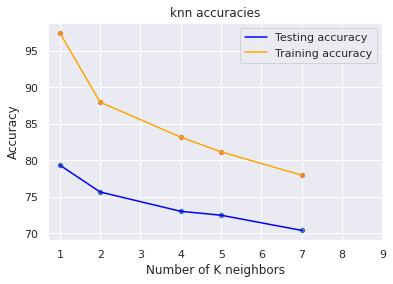

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.lineplot(ks,accTest, color = "blue")
sns.scatterplot(ks,accTest)
sns.lineplot(ks,accTrain, color = "orange")
sns.scatterplot(ks,accTrain)

plt.legend(labels = ["Testing accuracy","Training accuracy"])
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.title("knn accuracies")
plt.xlabel("Number of K neighbors")
plt.ylabel("Accuracy")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
test_predictions = knn.predict(x_test)



In [ ]:
accuracy_score(test_predictions,y_test)

0.7935056746532156

#### 2.3

In [ ]:
print("After testing more specific k values between 2 and 7, the best K seems to be 5. \n ")
standard_dev = np.std((test_predictions==y_test))
mean = (test_predictions==y_test).sum() / len(y_test)
z = 1.64485 #This is the Z score when we are looking for a 90% confidence interval
n = len(y_test)
lower_bound = mean - (z * (standard_dev/np.sqrt(n)))
upper_bound = mean + (z * (standard_dev/np.sqrt(n)))
print("90 percent confidence interval: (%.4f,%.4f)" % (lower_bound,upper_bound))

#### 2.4

In [ ]:
from sklearn.metrics import confusion_matrix
test_conf = confusion_matrix(test_predictions,y_test, normalize = "true")
test_conf


In [ ]:
#FINDING CONF INTERVAL FOR lucida
temp_test = []
temp_train = []
YY = y_test.reset_index(drop = True)
for i in range(len(test_predictions)): #This loop is looking for 
  if test_predictions[i] == "LUCIDA":
    temp_test.append(test_predictions[i])
    temp_train.append(YY[i])


temp_data = np.array(temp_test) == np.array(temp_train)
standard_dev = np.std(temp_data)
mean = row1[0]
z = 1.64485 #This is the Z score when we are looking for a 90% confidence interval
n = len(temp_train)
lower_bound = mean - (z * (standard_dev/np.sqrt(n)))
upper_bound = mean + (z * (standard_dev/np.sqrt(n)))
print("90 percent confidence interval: (%.4f,%.4f)" % (lower_bound,upper_bound)) 

90 percent confidence interval: (0.7976,0.8644)


In [ ]:
#FINDING CONF INTERVAL FOR TIMES
temp_test = []
temp_train = []
YY = y_test.reset_index(drop = True)
for i in range(len(test_predictions)):
  if test_predictions[i] == "TIMES":
    temp_test.append(test_predictions[i])
    temp_train.append(YY[i])


temp_data = np.array(temp_test) == np.array(temp_train)
standard_dev = np.std(temp_data)
mean = row2[1]
z = 1.64485 #This is the Z score when we are looking for a 90% confidence interval
n = len(temp_train)
lower_bound = mean + (z * (standard_dev/np.sqrt(n)))
upper_bound = mean - (z * (standard_dev/np.sqrt(n)))
print("90 percent confidence interval: (%.4f,%.4f)" % (lower_bound,upper_bound)) 

90 percent confidence interval: (0.5404,0.4988)


In [ ]:
#FINDING CONF INTERVAL FOR frank
temp_test = []
temp_train = []
YY = y_test.reset_index(drop = True)
for i in range(len(test_predictions)):
  if test_predictions[i] == "frank":
    temp_test.append(test_predictions[i])
    temp_train.append(YY[i])


temp_data = np.array(temp_test) == np.array(temp_train)
standard_dev = np.std(temp_data)
mean = row3[2]
z = 1.64485 #This is the Z score when we are looking for a 90% confidence interval
n = len(temp_train)
lower_bound = mean + (z * (standard_dev/np.sqrt(n)))
upper_bound = mean - (z * (standard_dev/np.sqrt(n)))
print("90 percent confidence interval: (%.4f,%.4f)" % (lower_bound,upper_bound)) 

In [ ]:
#FINDING CONF INTERVAL FOR lucida
temp_test = []
temp_train = []
YY = y_test.reset_index(drop = True)
for i in range(len(test_predictions)):
  if test_predictions[i] == "TAHOMA":
    temp_test.append(test_predictions[i])
    temp_train.append(YY[i])


temp_data = np.array(temp_test) == np.array(temp_train)
standard_dev = np.std(temp_data)
mean = row4[3]
z = 1.64485 #This is the Z score when we are looking for a 90% confidence interval
n = len(temp_train)
lower_bound = mean + (z * (standard_dev/np.sqrt(n)))
upper_bound = mean - (z * (standard_dev/np.sqrt(n)))
print("90 percent confidence interval: (%.4f,%.4f)" % (lower_bound,upper_bound)) 

#### 2.5

In [ ]:
ERR21=[]
ERR23=[]
ERR24=[]
for i in range(len(y_test)):
    
    if y_train[i]=='TIMES' and train_predictions[i]=="lucida":
        ERR21.append(i)
    if y_train[i]=="TIMES" and train_predictions[i]=="frank":
        ERR23.append(i)
    if y_train[i]=="TIMES" and train_predictions[i]=="TAHOMA":
        ERR24.append(i)

## Part 3

#### 3.1

In [ ]:
from numpy.linalg import eig

In [ ]:
#Need to make x_train scaler first
scaler = preprocessing.StandardScaler().fit(x_train)
x_scaled = scaler.transform(x_train)
X_scaled = pd.DataFrame(scaler.transform(x_train))
CORR = X_scaled.corr()

In [ ]:
#Compute eigen values and vectors from CORR
eigenvalues, eigenvectors = eig(CORR)

#L = eigenvalues
#W = eigenvectors
eigenvectors

array([[ 0.04306147,  0.00499943,  0.11517813, ...,  0.00610828,
        -0.00437456,  0.0143294 ],
       [ 0.0384284 ,  0.01119417,  0.11819546, ...,  0.07252399,
         0.06559677,  0.02255032],
       [ 0.03914946,  0.01350054,  0.11311216, ..., -0.10258897,
        -0.11820367, -0.01329255],
       ...,
       [ 0.03490909,  0.01303947,  0.01063654, ..., -0.00195548,
         0.07199195,  0.06497025],
       [ 0.03628336,  0.01214348,  0.01659012, ..., -0.08718884,
         0.01413958, -0.13211021],
       [ 0.03975006,  0.00942472,  0.01987556, ...,  0.04536753,
        -0.08427618,  0.02772543]])

In [ ]:
dataf = pd.DataFrame(eigenvectors)
dataf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,0.043061,0.004999,0.115178,0.045752,0.009135,-0.022381,-0.061584,-0.010782,0.048601,-0.037731,-0.001522,0.076573,0.059556,0.031414,-0.059773,-0.042397,0.042098,0.045014,0.054978,-0.048163,0.005357,0.041196,0.026279,0.030717,0.007510,0.046837,-0.038322,-0.051701,0.044200,0.066332,0.109539,-0.016546,-0.001601,-0.057895,-0.015072,0.002257,0.043519,0.053034,-0.020967,0.072562,...,0.013970,0.051482,-0.106791,-0.031834,-0.055193,0.031929,0.097989,0.041220,0.029692,-0.063570,0.016056,0.051333,-0.025904,-0.054793,-0.067164,0.052029,0.032310,0.025393,0.053059,0.066990,-0.007090,-0.045697,-0.047530,0.025738,0.119833,-0.006599,0.000375,0.007188,0.071805,0.018849,-0.004643,0.001637,0.038443,0.004424,0.016499,0.004698,0.007056,0.006108,-0.004375,0.014329
1,0.038428,0.011194,0.118195,0.038384,0.002835,-0.033128,-0.068289,-0.020028,0.057130,-0.039861,-0.002054,0.087362,0.053711,0.025414,-0.050241,-0.045544,0.057433,0.046821,0.053784,-0.039758,-0.004886,0.056595,0.024785,0.035521,0.008728,0.048324,-0.054875,-0.056319,0.034952,0.067510,0.115854,-0.014844,-0.013087,-0.061622,-0.018410,-0.005885,0.026919,0.034519,-0.034356,0.041022,...,0.023011,-0.085126,0.074627,0.020099,0.032107,0.035868,-0.150705,-0.019914,-0.018207,0.096021,-0.018535,-0.063008,0.015270,0.054771,0.001670,-0.023452,-0.026871,-0.044109,-0.020866,0.024862,0.021395,0.095831,0.036186,-0.050178,-0.171211,0.024154,-0.005420,0.026519,-0.004047,0.004974,-0.023781,0.019831,-0.102616,-0.036283,-0.060556,-0.031655,-0.004941,0.072524,0.065597,0.022550
2,0.039149,0.013501,0.113112,0.032935,-0.007909,-0.046689,-0.068178,-0.022374,0.069458,-0.041216,-0.003988,0.088080,0.057054,0.011780,-0.039602,-0.047289,0.085169,0.040277,0.046889,-0.020821,-0.021777,0.069645,0.044382,0.040983,0.004297,0.059907,-0.052534,-0.041351,0.013029,0.063484,0.083171,-0.010063,-0.040413,-0.059196,-0.017050,-0.015336,0.014379,0.016143,-0.053758,-0.003608,...,-0.082923,0.017709,0.010493,0.020862,0.020954,-0.072118,0.066013,-0.031983,-0.018637,-0.029582,-0.030253,0.014322,-0.019644,0.035403,0.062995,-0.052066,-0.032749,0.048854,0.036352,-0.116550,-0.026693,-0.063309,0.021453,0.020759,0.057123,-0.013537,0.019108,-0.004874,-0.038371,-0.033399,0.052109,-0.028673,0.060037,0.024205,0.056511,0.031762,0.017044,-0.102589,-0.118204,-0.013293
3,0.041387,0.014437,0.099112,0.025066,-0.013360,-0.059007,-0.062186,-0.025952,0.081173,-0.034044,-0.005266,0.079020,0.073047,-0.004659,-0.028271,-0.052552,0.107488,0.018165,0.031739,0.017303,-0.031162,0.084599,0.061406,0.045040,-0.009705,0.067525,-0.035831,-0.013905,0.005788,0.033748,0.018980,0.002780,-0.077763,-0.047493,-0.018791,-0.032541,0.007093,0.012075,-0.061968,-0.053752,...,0.080586,0.069324,0.036820,-0.050525,-0.016714,0.010137,-0.006714,0.068539,0.015091,-0.040028,0.082305,-0.017207,0.027548,-0.088715,-0.022486,0.023207,0.081545,-0.047763,-0.072183,0.024780,0.036930,0.038951,-0.061055,0.036349,0.033616,-0.004063,-0.044270,-0.056991,-0.056025,0.005233,-0.074414,0.016996,0.024850,-0.021054,-0.040020,0.021110,-0.009833,0.021809,0.111302,-0.045546
4,0.043379,0.020105,0.070344,0.006429,-0.019269,-0.074452,-0.042503,-0.031075,0.091442,-0.015678,-0.004759,0.048390,0.091947,-0.028556,-0.028643,-0.057516,0.110540,-0.021490,0.017785,0.057141,-0.018840,0.108003,0.077530,0.060426,-0.030960,0.073744,-0.002718,0.018554,0.033303,-0.028142,-0.080539,-0.000423,-0.091262,-0.020023,0.010689,-0.058354,0.017942,0.025818,-0.039879,-0.097963,...,0.023761,-0.074331,-0.069297,0.049775,0.014592,-0.002692,-0.001819,-0.054921,-0.019398,0.075992,-0.057600,0.042049,-0.022935,0.044915,0.022496,0.009513,0.007167,-0.005954,0.022357,0.048538,-0.078826,-0.036843,0.089298,-0.039459,-0.073505,0.008552,0.046391,0.032616,0.043578,0.033250,0.089841,

In [ ]:
eigenvalues[0:63].sum()

359.89312596657203

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'm')

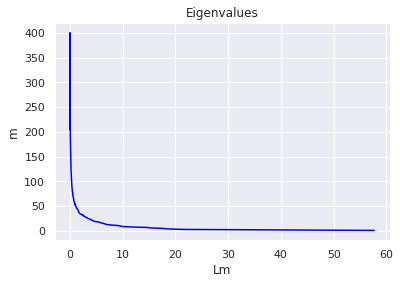

In [ ]:
#Display graph Lm vs m
sns.set_theme(style="darkgrid")
sns.lineplot(eigenvalues, range(1,401), color = "blue")

plt.title("Eigenvalues")
plt.xlabel("Lm")
plt.ylabel("m")

#### 3.2

In [ ]:
#Compute PEV(m) with for loop
#PEV(m) = (L1+....+Lm)/400
PEV = [] #will hold the PEV values
for m in range(0,400):
  pevVal = sum(eigenvalues[0:(m+1)])/400
  PEV.append(pevVal)


Text(0, 0.5, 'PEV')

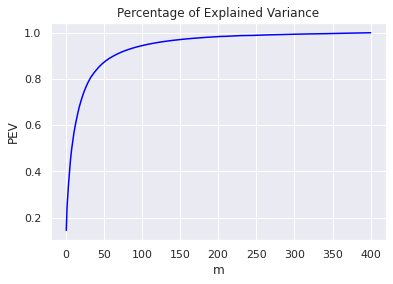

In [ ]:
#Graph PEV(m) vs m
#plt.plot(range(1,401),PEV)
sns.set_theme(style="darkgrid")
sns.lineplot(y = PEV, x = range(1,401), color = "blue")

plt.title("Percentage of Explained Variance")
plt.xlabel("m")
plt.ylabel("PEV")

In [ ]:
#Sort eigenvalues
eigenvalues = np.sort(eigenvalues)[::-1] #Sorts the eigenvalues in decreasing order
index = np.argsort(-eigenvalues) #Index for the sorted eigenvalues

In [ ]:
#Compute the smallest integer r so that PEV(r)>=90%
for i in range(0,400):
  if (PEV[i] >= 0.9):
    print('The smallest integer r so that PEV(r)>=90% is:', i)
    break

The smallest integer r so that PEV(r)>=90% is: 63


#### 3.3

In [ ]:
#Calculate PCA


In [ ]:
eigenvectors

array([[ 0.04306147,  0.00499943,  0.11517813, ...,  0.00610828,
        -0.00437456,  0.0143294 ],
       [ 0.0384284 ,  0.01119417,  0.11819546, ...,  0.07252399,
         0.06559677,  0.02255032],
       [ 0.03914946,  0.01350054,  0.11311216, ..., -0.10258897,
        -0.11820367, -0.01329255],
       ...,
       [ 0.03490909,  0.01303947,  0.01063654, ..., -0.00195548,
         0.07199195,  0.06497025],
       [ 0.03628336,  0.01214348,  0.01659012, ..., -0.08718884,
         0.01413958, -0.13211021],
       [ 0.03975006,  0.00942472,  0.01987556, ...,  0.04536753,
        -0.08427618,  0.02772543]])

In [ ]:
W = eigenvectors[:, index[0:400]] #Gets the eigenvectors that correspond to the largest r 
Z = np.matmul(SDATA, W) #To transform the data set
ZDATA = pd.DataFrame(Z) #Makes it into a data frame
ZDATA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
0,-10.449896,-3.876341,-1.928106,-0.244033,2.335085,-0.774345,1.332185,-1.394099,3.005314,2.759244,0.098666,0.886151,3.017889,-0.165044,-0.288989,-1.858981,-1.893795,-0.798000,0.322921,2.941778,-0.325023,0.151676,-0.033985,-2.331380,-0.288851,1.607949,0.422051,-0.847536,2.132564,0.503625,-0.322954,-0.628814,-0.274035,-0.685344,-0.775150,0.039736,-0.301041,-0.838721,0.750572,-0.719484,...,0.404209,-0.351443,0.306402,0.404982,0.018430,-0.365516,0.186561,0.061058,0.066379,-0.061479,0.005222,0.170939,-0.004034,0.056799,-0.276922,-0.130405,0.240309,0.333861,-0.139427,-0.214535,0.123064,0.257896,-0.228597,-0.220293,0.056613,0.078185,0.076707,0.297330,-0.060649,0.040424,0.344217,0.177871,-0.070321,0.149901,-0.435537,-0.187262,0.213297,0.271807,-0.133353,-0.133245
1,1.688791,-7.253731,2.198777,-0.736916,-3.988544,-2.588567,-2.065588,-10.543438,-2.386962,4.939758,1.181609,-3.702237,-2.593845,-2.962335,-2.196041,2.033395,1.994381,-3.847405,0.121739,2.368417,2.498943,-4.665325,2.395984,-2.397608,3.296147,-0.876381,-1.995178,2.167431,-0.698542,-0.377548,-1.016363,-1.214507,1.103021,0.174818,0.083537,0.896120,0.610999,1.059194,-0.708036,0.121889,...,0.137612,0.166124,0.167725,-0.027926,-0.066704,-0.092399,0.112707,-0.144431,-0.030921,0.068069,0.052860,-0.212673,-0.048676,-0.305791,0.067330,0.009198,0.253616,0.063309,0.025759,-0.024647,0.097610,0.109141,-0.020089,0.092400,-0.142555,0.121866,-0.118236,-0.061670,0.168765,-0.045492,-0.225469,-0.154475,0.093162,0.116424,-0.105610,0.098505,0.018195,-0.129395,0.069422,0.021908
2,0.696782,-6.461807,-1.542481,0.503195,-4.059120,-1.192598,-2.261575,-9.137327,0.073592,3.766237,0.947715,-4.859490,0.310597,-1.660423,-1.006068,-1.035577,2.751558,-1.758599,-0.394172,3.412013,2.573341,-5.052843,2.085462,-3.521320,4.710089,-1.848586,-2.502600,0.083452,-0.698003,0.036933,-1.134909,-2.611235,1.397552,0.641947,-0.639938,2.185656,0.721901,1.424471,-1.239333,-0.032255,...,0.088196,0.212320,0.006294,-0.070153,-0.106746,-0.147806,0.149162,0.033844,-0.013374,0.008917,-0.030446,-0.192880,-0.075067,-0.346054,0.093291,0.010265,0.173114,0.178304,0.043296,-0.120271,0.111660,0.122232,-0.140712,0.081823,-0.001038,0.050282,-0.128349,-0.119789,0.079776,-0.056706,-0.029056,-0.207333,0.106951,0.045979,-0.095283,-0.025883,-0.008325,-0.178052,-0.045900,0.003503
3,-5.635275,-1.136681,-2.710420,1.671669,-7.938628,2.511495,-1.795400,1.270879,-3.028997,2.093225,-1.544657,1.718882,0.730275,0.574763,1.670928,-0.058301,1.404035,-1.141038,-1.534117,-1.759513,0.180940,-1.512804,0.171555,-2.004123,-0.602419,-0.282743,-0.965014,3.009285,3.229120,-1.838098,-0.316514,-1.570119,1.920271,-1.234513,1.451371,-0.925837,2.174449,0.403012,-0.600434,0.391576,...,0.175168,-0.189585,-0.089809,0.373917,-0.230371,-0.287450,0.344569,-0.107126,-0.172376,-0.199703,0.059410,0.072856,-0.181734,0.175776,-0.462024,0.464226,0.069206,0.081357,-0.120955,-0.002632,-0.075111,-0.228525,-0.264908,-0.005578,0.131705,0.076442,0.005633,-0.043048,0.042824,0.068468,0.053815,0.125352,0.010698,-0.320756,0.120057,-0.241279,-0.098646,0.212273,-0.079508,-0.248090
4,-3.570199,-7.738041,6.566796,4.464545,2.053514,8.825757,-4.187059,-2.622052,-0.637158,1.058888,-3.438103,-0.144158,2.582883,-0.145281,2.593857,-4.434289,-2.926640,-1.083102,0.846987,-1.456695,2.133742,-2.125210,0.726492,-1.850255,0.283121,0.214028,-3.980669,1.507269,2.263450,1.084408,0.324066,0.087978,-0.025386,-1.370402,0.996022,-1.045095,-0.145790,0.305074,-0.337757,-0.089667,...,0.019207,-0.201258,0.138256,0.194760,-0.245375,-0.026140,0.048728,-0.078221,-0.052183,-0.194391,-0.128426,0.046835,-0.030010,-0.073689,0.116841,0.043918,0.054615,-0.072419,-0.019165,0.014017,0.046762,-0.129717,-0.130067,0.132858,-0.026544,0.270103,0.136218,0.147922,0

In [ ]:
ZDATA.drop(ZDATA.iloc[:,73:400], axis=1, inplace=True)
ZDATA

#### 3.4

In [ ]:

bound_ZDATA = pd.concat([TRUC, ZDATA], axis=1, ignore_index=True)
ZCL1 = bound_ZDATA[bound_ZDATA[0] == 'lucida']
ZCL2 = bound_ZDATA[bound_ZDATA[0] == 'TIMES']
ZCL3 = bound_ZDATA[bound_ZDATA[0] == 'frank']
ZCL4 = bound_ZDATA[bound_ZDATA[0] == 'TAHOMA']

In [ ]:
ZCL1X = ZCL1.drop(columns=[0])
ZCL1Y = ZCL1[0]
ZCL2X = ZCL2.drop(columns=[0])
ZCL2Y = ZCL2[0]
ZCL3X = ZCL3.drop(columns=[0])
ZCL3Y = ZCL3[0]
ZCL4X = ZCL4.drop(columns=[0])
ZCL4Y = ZCL4[0]

In [ ]:
#Split into train and test sets
ZCL1X_train, ZCL1X_test, ZCL1Y_train, ZCL1Y_test = train_test_split(ZCL1X,ZCL1Y, test_size=0.2, random_state=123)
ZCL2X_train, ZCL2X_test, ZCL2Y_train, ZCL2Y_test = train_test_split(ZCL2X,ZCL2Y, test_size=0.2, random_state=123)
ZCL3X_train, ZCL3X_test, ZCL3Y_train, ZCL3Y_test = train_test_split(ZCL3X,ZCL3Y, test_size=0.2, random_state=123)
ZCL4X_train, ZCL4X_test, ZCL4Y_train, ZCL4Y_test = train_test_split(ZCL4X,ZCL4Y, test_size=0.2, random_state=123)

#Combine training sets into one set
ZX_TRAIN = pd.concat([ZCL1X_train, ZCL2X_train, ZCL3X_train, ZCL4X_train])
ZY_TRAIN = pd.concat([ZCL1Y_train, ZCL2Y_train, ZCL3Y_train, ZCL4Y_train])
zx_train = ZX_TRAIN
zy_train = ZY_TRAIN
#Combine test sets into one set
ZX_TEST = pd.concat([ZCL1X_test, ZCL2X_test, ZCL3X_test, ZCL4X_test])
ZY_TEST = pd.concat([ZCL1Y_test, ZCL2Y_test, ZCL3Y_test, ZCL4Y_test])
zx_test = ZX_TEST
zy_test = ZY_TEST

In [ ]:
%%time
#Perform Knn with ZDATA

k = 30 #use same k* as before
print('K = ', k)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(zx_train, zy_train)
ztest_predictions = knn.predict(zx_test)
ztrain_predictions = knn.predict(zx_train)

train_accuracy = (ztrain_predictions==zy_train).sum()/len(zy_train)*100
print('Accuracy for training set: %.2f%%' % train_accuracy)

test_accuracy = (ztest_predictions==zy_test).sum()/len(zy_test)*100
print('Accuracy for test set: %.2f%%' % test_accuracy)

In [ ]:
#Confidence Interval for PCA model knn, k=3
standard_dev = np.std((ztest_predictions==zy_test))
mean = (ztest_predictions==zy_test).sum() / len(zy_test)
z = 1.64485 #This is the Z score when we are looking for a 90% confidence interval
n = len(zy_test)
lower_bound = mean + (z * (standard_dev/np.sqrt(n)))
upper_bound = mean - (z * (standard_dev/np.sqrt(n)))
print("90 percent confidence interval: (%.4f,%.4f)" % (lower_bound,upper_bound))


#### 3.5

In [ ]:
#rename to make graphing easier
CL1DATA = ZCL1X_train #will be black
CL2DATA = ZCL2X_train #will be red
CL3DATA = ZCL3X_train #will be green
CL4DATA = ZCL4X_train #will be blue

In [ ]:
#plot CL2 vs CL4
plt.scatter(CL2DATA[1], CL2DATA[2], s =5, color = 'red')
plt.scatter(CL4DATA[1], CL4DATA[2], s =5, color = 'blue')

plt.legend(labels = ['CL2','CL4'])
plt.title('CL2 vs CL4')

In [ ]:
#plot CL2 vs CL3
plt.scatter(CL2DATA[1], CL2DATA[2], s =5, color = 'red')
plt.scatter(CL3DATA[1], CL3DATA[2], s =5, color = 'green')

plt.legend(labels = ['CL2','CL3'])
plt.title('CL2 vs CL3')

In [ ]:
#plot CL2 vs CL1
plt.scatter(CL2DATA[1], CL2DATA[2], s =5, color = 'red')
plt.scatter(CL1DATA[1], CL1DATA[2], s =5, color = 'black')

plt.legend(labels = ['CL2','CL1'])
plt.title('CL2 vs CL1')

#### 3.6

In [ ]:
#Get data out of misclassifcation indexes
ERR21DATA = CL2DATA.iloc[ERR21]
ERR23DATA = CL2DATA.iloc[ERR23]
ERR24DATA = CL2DATA.iloc[ERR24]

In [ ]:

#Plot misclassification errors for CL2
plt.scatter(CL2DATA[1], CL2DATA[2], s = 5, color = 'red')
plt.scatter(ERR21DATA[1], ERR21DATA[2], s = 5, color = 'black')
plt.scatter(ERR23DATA[1], ERR23DATA[2], s = 5, color = 'green')
plt.scatter(ERR24DATA[1], ERR24DATA[2], s = 5, color = 'blue')

plt.legend(labels = ['CL2','ERR21','ERR23', 'ERR24'])
plt.title('Misclassifcation Errors for CL2')